#Network Cluster Analysis

##Exercise Session 3

In [0]:
# Install necessary packages
!pip install python-igraph
!pip install easygui
!pip install cairocffi
!pip install snap-stanford
!pip install GephiStreamer
!pip install pajek-tools
!pip install -U bokeh
!pip install networkx

Requirement already up-to-date: bokeh in /usr/local/lib/python3.6/dist-packages (2.0.2)


In [0]:
# Import of required libraries and packages
import numpy as np
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
import easygui
import statistics
import os
import io
import re
import networkx as nx
print(ig.__version__)

0.8.2


## Part I: Preprocessing

In [0]:
# Read data in gml-format in iGraph
filename = "cond-mat-2005.gml"
print(filename)

g = ig.Graph.Read_GML(filename)

ig.summary(g)

# Get the number of vertices and edges for the largest component
print("Number of vertices:", g.vcount())
print("Number of edges:", g.ecount())
print('')

# Check if the network is undirected/directed, weighted/unweighted and connected
print('The network is weighted:', g.is_weighted())
print('The network is directed:', g.is_directed())
print('The network is connected:', g.is_connected())

cond-mat-2005.gml
IGRAPH U--- 40421 175692 -- 
+ attr: id (v), label (v), value (e)
Number of vertices: 40421
Number of edges: 175692

The network is weighted: False
The network is directed: False
The network is connected: False


Number of degrees calculated :  40421, minimum :  0, maximum :  278


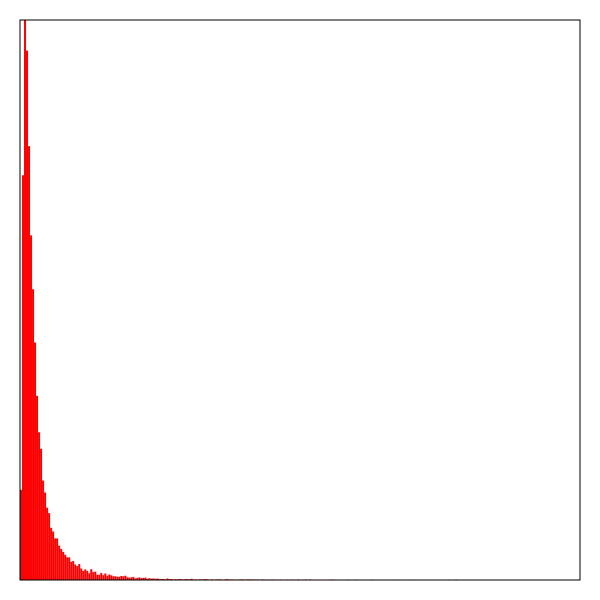

In [0]:
# Calculate degree and betweenness
degree = g.degree()
#betweenness = g.betweenness(weights=None)
print("Number of degrees calculated : % 2d, minimum : % 2d, maximum : % 2d" % (len(degree), min(degree), max(degree)))
#print("Betweenness: minimum: % 5.2f, maximum: % 5.4f" %(min(betweenness), max(betweenness)))

# Using the default igraph function for the calculation and plotting of the degree distribution
deg_dist = g.degree_distribution()
ig.plot(deg_dist)

278
[18892 11278  4281  2044  1214   772   441   352   263   175   160   112
    88    60    46    33    29    25    22    17    16    11    15    10
    10     7     3     7]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140.]


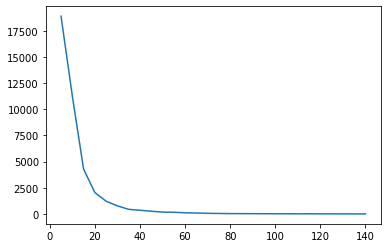

In [0]:
# Improved calculation of degree distribution and plotting using numpy and matplotlib
print(max(degree))
hist, bins = np.histogram(degree, bins=np.linspace(0,140,29))
print(hist)
print(bins)
plt.plot(bins[1:], hist)

In [0]:
# Retain only this largest component
cl = g.clusters()
lcc = cl.giant()

# Get the number of vertices and edges for the largest component
print("Number of vertices:", lcc.vcount())
print("Number of edges:", lcc.ecount())

Number of vertices: 36458
Number of edges: 171735


Number of degrees calculated :  36458, minimum :  1, maximum :  278
278
[15286 10952  4270  2024  1214   772   441   352   263   175   160   112
    88    60    46    33    29    25    22    17    16    11    15    10
    10     7     3     7]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140.]


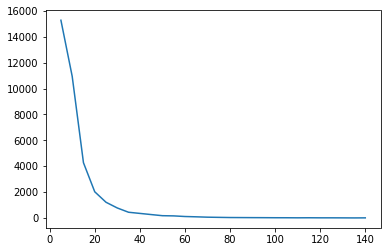

In [0]:
# Calculate degree of lcc
lcc_degree = lcc.degree()
print("Number of degrees calculated : % 2d, minimum : % 2d, maximum : % 2d" % (len(lcc_degree), min(lcc_degree), max(lcc_degree)))

# Plot degree distribution of lcc
print(max(lcc_degree))
hist, bins = np.histogram(lcc_degree, bins=np.linspace(0,140,29))
print(hist)
print(bins)
plt.plot(bins[1:], hist)

##Part II: Clustering & Visualization

In [0]:
# Run the Fast-Greedy community detection algorithm from the igraph packages on the reduced network
cl = lcc.community_fastgreedy()
# convert it into a flat clustering
clusters = cl.as_clustering()
# get the membership vector
membership = clusters.membership
# Transform it into numpy array
np_membership = np.array(membership)

# Get a tuple of unique clusters & their frequency in numpy array
uniqueClusters, occurCount = np.unique(np_membership, return_counts=True)
print('In the network there are ', len(uniqueClusters), ' clusters.')

# Zip both the arrays
listOfUniqueClusters = zip(uniqueClusters, occurCount)
 
print('Unique Clusters along with occurrence Count')
# Iterate over the zip object
for elem in listOfUniqueClusters:
   print('Cluster No: ', elem[0] , ' Contains : ' , elem[1], ' nodes')

In the network there are  462  clusters.
Unique Clusters along with occurrence Count
Cluster No:  0  Contains :  5839  nodes
Cluster No:  1  Contains :  7453  nodes
Cluster No:  2  Contains :  7298  nodes
Cluster No:  3  Contains :  2932  nodes
Cluster No:  4  Contains :  92  nodes
Cluster No:  5  Contains :  477  nodes
Cluster No:  6  Contains :  147  nodes
Cluster No:  7  Contains :  904  nodes
Cluster No:  8  Contains :  13  nodes
Cluster No:  9  Contains :  499  nodes
Cluster No:  10  Contains :  180  nodes
Cluster No:  11  Contains :  1027  nodes
Cluster No:  12  Contains :  151  nodes
Cluster No:  13  Contains :  1157  nodes
Cluster No:  14  Contains :  807  nodes
Cluster No:  15  Contains :  200  nodes
Cluster No:  16  Contains :  294  nodes
Cluster No:  17  Contains :  288  nodes
Cluster No:  18  Contains :  30  nodes
Cluster No:  19  Contains :  8  nodes
Cluster No:  20  Contains :  307  nodes
Cluster No:  21  Contains :  17  nodes
Cluster No:  22  Contains :  7  nodes
Cluster

In [0]:
# Calculate modularity score for the Fast-Greedy algorithm 
modularity = lcc.modularity(membership)
print('The modularity for the Fast-Greedy algorithm is {}'.format(format(modularity, '.2f')))

The modularity for the Fast-Greedy algorithm is 0.62


In [0]:
# Visualize the  network with nodes in different colour according to their cluster membership



In [0]:
# Plot Network Communities with Fruchterman-Reingold layout

# Define style from network plotting
visual_style = {}
visual_style["mark_groups"] = True
visual_style["vertex_size"] = 8
#visual_style["vertex_label_size"] = 2
#visual_style["vertex_color"] = [ClusterColoringPalette[x] for x in membership]
visual_style["vertex_label"] = None
visual_style["edge_width"] = 1
visual_style["layout"] = 'fruchterman_reingold'
visual_style["bbox"] = (1200,1200)
visual_style["margin"] = 20

out = ig.plot(clusters, **visual_style)
out.save('cl_fr.png')

In [0]:
# Plot Network Communities with DRL layout

# Define style from network plotting
visual_style = {}
visual_style["mark_groups"] = True
visual_style["vertex_size"] = 10
#visual_style["vertex_label_size"] = 2
#visual_style["vertex_color"] = [ClusterColoringPalette[x] for x in membership]
visual_style["vertex_label"] = None
visual_style["edge_width"] = 1
visual_style["layout"] = 'drl'
visual_style["bbox"] = (1200,1200)
visual_style["margin"] = 20

out = ig.plot(clusters, **visual_style)
out.save('cl_drl.png')

## Part III: Compare Cluster Solutions

1. Run two other algorithms: Leading Eigenvector (= Newman), MultiLevel (= Louvain Method)
2. Compare the number of obtained clusters and modularity scores.
3. Try different visualization layouts, which combination cluster algorithm-layout provides the most appealing results? Is this the best clustering?
4. Use the 'compare_communities()' function from iGraph. Discuss the different possible measure and try to interprete the result of the pairwise comparison.

###Leading Eigenvector (=Newman) algorithm

In [0]:
# Run the Leading Eigenvector (=Newman) community detection algorithm from the igraph packages on the reduced network
newman = lcc.community_leading_eigenvector()
# get the membership vector
membership = newman.membership
# Transform it into numpy array
np_membership = np.array(membership)

# Get a tuple of unique clusters & their frequency in numpy array
uniqueClusters, occurCount = np.unique(np_membership, return_counts=True)
print('In the network there are', len(uniqueClusters), 'clusters.')

# Calculate modularity scores for each cluster solution
modularity = lcc.modularity(membership)
print('The modularity for the Newman method is {}'.format(format(modularity, '.2f')))

# Zip both the arrays
listOfUniqueClusters = zip(uniqueClusters, occurCount)
 
print('Unique Clusters along with occurrence Count')
# Iterate over the zip object
for elem in listOfUniqueClusters:
   print('Cluster No: ', elem[0] , ' Contains : ' , elem[1], ' nodes')

In the network there are 3 clusters.
The modularity for the Newman method is 0.33
Unique Clusters along with occurrence Count
Cluster No:  0  Contains :  30657  nodes
Cluster No:  1  Contains :  3673  nodes
Cluster No:  2  Contains :  2128  nodes


In [0]:
# Plot Network Communities with Fruchterman-Reingold layout

# Define style from network plotting
visual_style = {}
visual_style["mark_groups"] = True
visual_style["vertex_size"] = 10
#visual_style["vertex_label_size"] = 2
#visual_style["vertex_color"] = [ClusterColoringPalette[x] for x in membership]
visual_style["vertex_label"] = None
visual_style["edge_width"] = 1
visual_style["layout"] = 'fruchterman_reingold'
visual_style["bbox"] = (1200,1200)
visual_style["margin"] = 20

out = ig.plot(newman, **visual_style)
out.save('newman_fr.png')

In [0]:
# Plot Network Communities with DRL layout

# Define style from network plotting
visual_style = {}
visual_style["mark_groups"] = True
visual_style["vertex_size"] = 10
#visual_style["vertex_label_size"] = 2
#visual_style["vertex_color"] = [ClusterColoringPalette[x] for x in membership]
visual_style["vertex_label"] = None
visual_style["edge_width"] = 1
visual_style["layout"] = 'drl'
visual_style["bbox"] = (1200,1200)
visual_style["margin"] = 20

out = ig.plot(newman, **visual_style)
out.save('newman_drl.png')

###MultiLevel (= Louvain Method) algorithm

In [0]:
# Run the MultiLevel (= Louvain Method) algorithm from the igraph packages on the reduced network
louvain = lcc.community_multilevel()
# get the membership vector
membership = louvain.membership
# Transform it into numpy array
np_membership = np.array(membership)

# Get a tuple of unique clusters & their frequency in numpy array
uniqueClusters, occurCount = np.unique(np_membership, return_counts=True)
print('In the network there are', len(uniqueClusters), 'clusters.')

# Calculate modularity scores for each cluster solution
modularity = lcc.modularity(membership)
print('The modularity for the Newman method is {}'.format(format(modularity, '.2f')))
print('')

# Zip both the arrays
listOfUniqueClusters = zip(uniqueClusters, occurCount)
 
print('Unique Clusters along with occurrence Count')
# Iterate over the zip object
for elem in listOfUniqueClusters:
   print('Cluster No: ', elem[0] , ' Contains : ' , elem[1], ' nodes')

In the network there are 89 clusters.
The modularity for the Newman method is 0.72

Unique Clusters along with occurrence Count
Cluster No:  0  Contains :  539  nodes
Cluster No:  1  Contains :  1601  nodes
Cluster No:  2  Contains :  2231  nodes
Cluster No:  3  Contains :  785  nodes
Cluster No:  4  Contains :  1786  nodes
Cluster No:  5  Contains :  3345  nodes
Cluster No:  6  Contains :  719  nodes
Cluster No:  7  Contains :  259  nodes
Cluster No:  8  Contains :  3166  nodes
Cluster No:  9  Contains :  341  nodes
Cluster No:  10  Contains :  1540  nodes
Cluster No:  11  Contains :  779  nodes
Cluster No:  12  Contains :  1106  nodes
Cluster No:  13  Contains :  1530  nodes
Cluster No:  14  Contains :  1418  nodes
Cluster No:  15  Contains :  402  nodes
Cluster No:  16  Contains :  426  nodes
Cluster No:  17  Contains :  1583  nodes
Cluster No:  18  Contains :  447  nodes
Cluster No:  19  Contains :  243  nodes
Cluster No:  20  Contains :  688  nodes
Cluster No:  21  Contains :  110

In [0]:
# Plot Network Communities with Fruchterman-Reingold layout

# Define style from network plotting
visual_style = {}
visual_style["mark_groups"] = True
visual_style["vertex_size"] = 8
#visual_style["vertex_label_size"] = 2
#visual_style["vertex_color"] = [ClusterColoringPalette[x] for x in membership]
visual_style["vertex_label"] = None
visual_style["edge_width"] = 1
visual_style["layout"] = 'fruchterman_reingold'
visual_style["bbox"] = (1200,1200)
visual_style["margin"] = 20

out = ig.plot(louvain, **visual_style)
out.save('louvain_fr.png')

In [0]:
# Plot Network Communities with DRL layout

# Define style from network plotting
visual_style = {}
visual_style["mark_groups"] = True
visual_style["vertex_size"] = 10
#visual_style["vertex_label_size"] = 2
#visual_style["vertex_color"] = [ClusterColoringPalette[x] for x in membership]
visual_style["vertex_label"] = None
visual_style["edge_width"] = 1
visual_style["layout"] = 'drl'
visual_style["bbox"] = (1500,1500)
visual_style["margin"] = 20

out = ig.plot(louvain, **visual_style)
out.save('louvain_drl.png')